In [2]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import petroeval as pet

In [3]:
#importing files
train = pd.read_csv('./Train.csv', sep=';')
test = pd.read_csv('./Test.csv', sep=';')

ntrain = train.shape[0]
ntest = test.shape[0]
target = train.FORCE_2020_LITHOFACIES_LITHOLOGY.copy()
df = pd.concat((train, test)).reset_index(drop=True)

In [17]:
train.head(30)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,DEPTH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,1
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,2
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,3
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,4
5,15/9-13,495.288,437641.96875,6470972.5,-470.261780,NORDLAND GP.,NaN,19.453100,NaN,1.585567,...,NaN,NaN,-0.601600,NaN,NaN,NaN,NaN,65000,1.0,5
6,15/9-13,495.440,437641.96875,6470972.5,-470.413788,NORDLAND GP.,NaN,19.462496,NaN,1.576569,...,NaN,NaN,-0.598369,NaN,NaN,NaN,NaN,65000,1.0,6
7,15/9-13,495.592,437641.96875,6470972.5,-470.565796,NORDLAND GP.,NaN,19.468800,NaN,1.587011,...,NaN,NaN,-0.602039,NaN,NaN,NaN,NaN,65000,1.0,7
8,15/9-13,495.744,437641.96875,6470972.5,-470.717773,NORDLAND GP.,NaN,19.468800,NaN,1.613674,...,NaN,NaN,-0.614364,NaN,NaN,NaN,NaN,65000,1.0,8
9,15/9-13,495.896,437641.96875,6470972.5,-470.869782,NORDLAND GP.,NaN,19.468800,NaN,1.634622,...,NaN,NaN,-0.621813,NaN,NaN,NaN,NaN,65000,1.0,9


In [11]:
train.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [6]:
test.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


In [7]:
test.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
count,136786.000000,136727.000000,1.367270e+05,136727.000000,131141.000000,39097.000000,136199.000000,136727.000000,119826.000000,136786.000000,...,66627.000000,66964.000000,68316.000000,43220.000000,13515.000000,111556.000000,20269.000000,11316.000000,55790.000000,29848.000000
mean,2501.136889,467884.598172,6.708199e+06,-2397.835918,12.613567,3.137817,3.844914,3.662074,2.324925,65.223264,...,43.528467,10.963364,26.406939,185.389543,0.160979,0.014441,6.028683,4.906861,22.669058,5.280645
std,1043.245788,35865.313917,1.352924e+05,937.001116,3.218969,17.293036,24.170949,23.242750,0.243602,31.146538,...,25.530487,1.839420,31.913763,63.173605,0.536332,0.054151,49.607255,22.963156,13.436052,55.475790
min,227.296008,423237.531250,6.461833e+06,-4362.296387,6.682522,0.255146,0.148474,0.152317,1.289989,6.342400,...,-24.132233,8.500000,0.004297,79.327354,-6.402187,-1.213720,0.129413,0.063258,0.572329,0.262056
25%,1707.948917,442441.406250,6.605454e+06,-3171.749634,9.049458,0.850029,0.933067,0.902655,2.116576,44.557275,...,31.179566,8.500000,12.240131,146.022373,0.027619,-0.001835,0.134206,0.543010,12.753529,1.081298
50%,2471.823595,455904.187500,6.759398e+06,-2442.877197,12.428942,1.416000,1.669926,1.657664,2.376285,60.110472,...,48.967999,12.250001,20.878899,175.515274,0.124714,0.009203,0.143792,1.435970,19.927827,1.587683
75%,3294.643006,485144.859375,6.822772e+06,-1681.509216,14.177558,2.578526,3.088695,2.894494,2.531131,82.757637,...,62.133951,12.250001,31.232986,204.037148,0.247048,0.026884,0.149783,4.425004,29.882400,3.274492
max,5007.417976,548460.437500,6.853315e+06,-205.295288,27.344881,1566.168457,1901.766602,1582.094482,3.073430,500.878357,...,125.522781,17.500000,621.078247,494.096802,7.362912,0.404614,426.921356,957.984436,131.990906,2000.000000


In [12]:
train.shape, test.shape

((1170511, 29), (136786, 27))

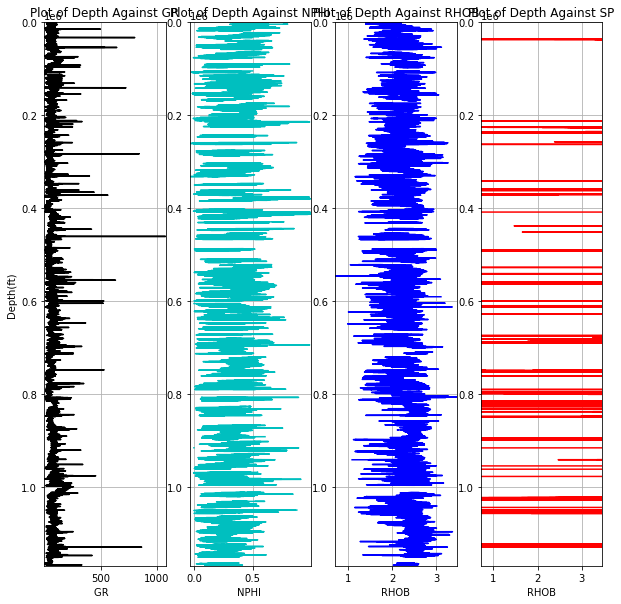

In [13]:
pet.four_plots(train, 'GR', 'NPHI', 'RHOB', 'SP', 0, 1170511)

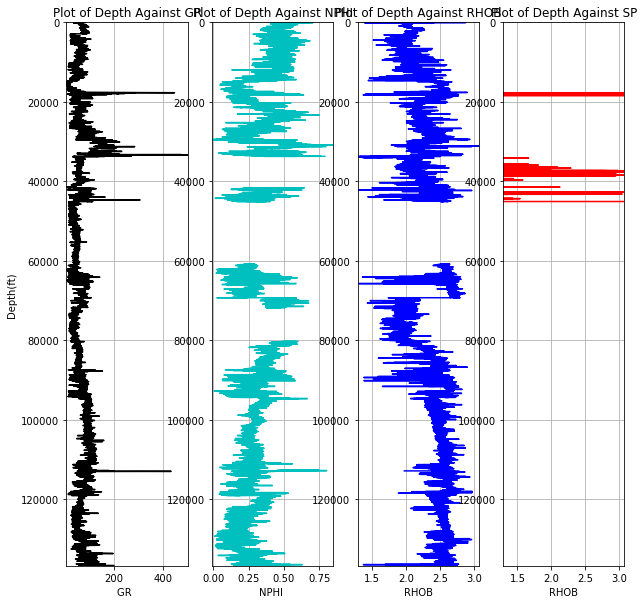

In [14]:
pet.four_plots(test, 'GR', 'NPHI', 'RHOB', 'SP', 0, 136786)

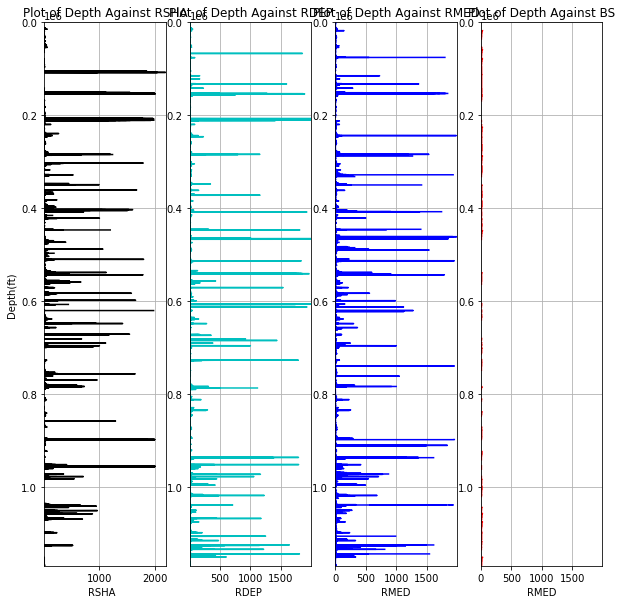

In [16]:
pet.four_plots(train, 'RSHA', 'RDEP', 'RMED', 'BS', 0, 1170511)

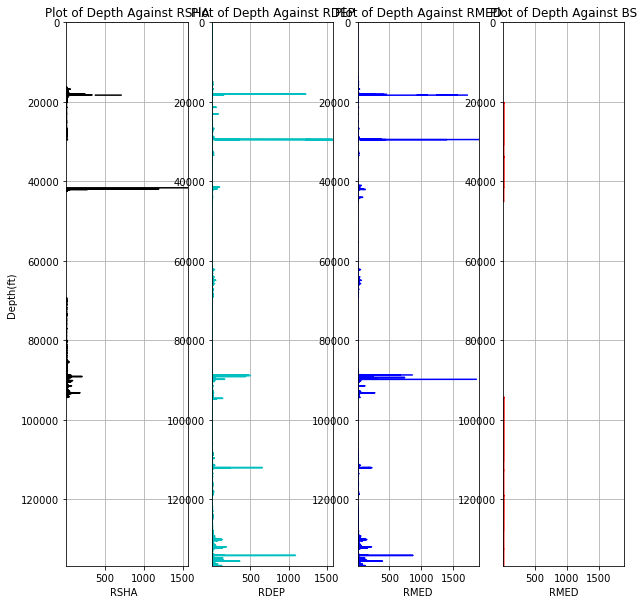

In [18]:
pet.four_plots(test, 'RSHA', 'RDEP', 'RMED', 'BS', 0, 136786)

In [ ]:
pet.preprocessing(